<a href="https://colab.research.google.com/github/yash-3/machine-learning/blob/main/AI_Recomendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-surprise

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from surprise import SVD, KNNBasic, Dataset, Reader, NMF
from surprise.model_selection import cross_validate

In [4]:
from google.colab import drive  #import gogle drive data

In [5]:
drive.mount('/content/drive') # mount drive data into colab cloud and enter authentication code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset Files"  

/content/drive/My Drive/Colab Notebooks/Dataset Files


In [7]:
# function for copmarision of parametes for different algorithms
def parameter_comparision(svd,nmf,knn):
    # Calculate Average of RMSE, MAE, Fit time and Test time
    ls = ['test_mae','test_rmse','fit_time','test_time']
    svd_ls=[]
    for i in range(len(ls)):
        svd_ls.append(np.mean(svd[ls[i]]))
    nmf_ls=[]
    for i in range(len(ls)):
        nmf_ls.append(np.mean(nmf[ls[i]]))
    knn_ls=[]
    for i in range(len(ls)):
        knn_ls.append(np.mean(knn[ls[i]]))

    print(svd_ls)
    print(nmf_ls)
    print(knn_ls)

    # Plot graph of parameters for all methods
    labels = ['MAE','RMSE','Fit Time','Test Time']
    x = svd_ls;
    y = nmf_ls;
    z = knn_ls;

    x_axis = np.arange(len(labels))
    plt.bar(x_axis-0.2, x, 0.2, label='SVD')
    plt.bar(x_axis, y, 0.2, label='NMF')
    plt.bar(x_axis+0.2, z, 0.2, label='KNN')

    plt.xticks(x_axis, labels)
    plt.title("Parameter Comparision")
    plt.legend()
    plt.show()

### **Movie Lens Dataset**

In [8]:
# Load the movielens-100k dataset
cols = ['UserId','MovieId','Rating','TimeStamp']
df_movie = pd.read_csv('u.data',sep = '\t',header = None,names = cols)
df_movie

,UserId,MovieId,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


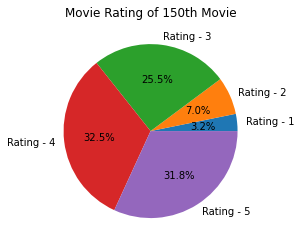

In [9]:
# Visualize data
data_150th_movie = df_movie[df_movie['MovieId']==150]
lst =[0,0,0,0,0]
data_150th_movie_rating = data_150th_movie['Rating'].values
for i in range(len(data_150th_movie_rating)):
    lst[data_150th_movie_rating[i]-1]+=1
plt.pie(lst,labels=['Rating - 1','Rating - 2','Rating - 3','Rating - 4','Rating - 5'],explode=(0,0,0,0,0),shadow=False,autopct='%1.1f%%')
plt.title("Movie Rating of 150th Movie")

plt.show()

Apply Algorithms on Movie dataset

In [10]:
reader=Reader(rating_scale=(1,5))
trainset=Dataset.load_from_df(df_movie[['UserId','MovieId','Rating']],reader).build_full_trainset()
data=Dataset.load_from_df(df_movie[['UserId','MovieId','Rating']],reader)

SVD Algorithm

In [11]:
# use SVD Algorithm
algo = SVD()
algo.fit(trainset)
svd_movie = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9377  0.9395  0.9430  0.9287  0.9379  0.9373  0.0047  
MAE (testset)     0.7389  0.7417  0.7439  0.7317  0.7384  0.7389  0.0041  
Fit time          3.83    3.88    3.84    3.83    3.82    3.84    0.02    
Test time         0.22    0.14    0.22    0.14    0.22    0.19    0.04    


In [12]:
svd_movie

{'fit_time': (3.8339602947235107,
  3.8758585453033447,
  3.8449325561523438,
  3.832040786743164,
  3.8220694065093994),
 'test_mae': array([0.73887869, 0.74166815, 0.74394335, 0.73167408, 0.73835673]),
 'test_rmse': array([0.93772434, 0.93947973, 0.94298462, 0.92868206, 0.9378582 ]),
 'test_time': (0.22137737274169922,
  0.1426258087158203,
  0.2184748649597168,
  0.13849925994873047,
  0.2173299789428711)}

NMF Algorithm

In [13]:
# use NFM Algorithm
algo = NMF()
algo.fit(trainset)
nmf_movie = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9661  0.9627  0.9600  0.9658  0.9651  0.9639  0.0023  
MAE (testset)     0.7588  0.7569  0.7553  0.7565  0.7610  0.7577  0.0020  
Fit time          4.80    4.87    4.79    4.89    4.88    4.85    0.04    
Test time         0.12    0.19    0.20    0.12    0.21    0.17    0.04    


In [14]:
nmf_movie

{'fit_time': (4.795897483825684,
  4.869609832763672,
  4.788614511489868,
  4.893774747848511,
  4.883890628814697),
 'test_mae': array([0.75879307, 0.75685525, 0.75533487, 0.75654186, 0.7609937 ]),
 'test_rmse': array([0.96610532, 0.96268705, 0.95997667, 0.96576918, 0.96513817]),
 'test_time': (0.12135148048400879,
  0.1910686492919922,
  0.1986403465270996,
  0.12294316291809082,
  0.20916390419006348)}

KNN Algorithm

In [15]:
# use KNNBasic Algorithm
algo = KNNBasic()
algo.fit(trainset)
knn_movie = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9794  0.9737  0.9815  0.9807  0.9768  0.9784  0.0029  
MAE (testset)     0.7770  0.7680  0.7736  0.7742  0.7706  0.7727  0.0031  
Fit time          0.38    0.34    0.28    0.40    0.36    0.35    0.04    
Test time         3.62    3.69    3.62    3.66    3.68    3.65    0.03    


In [16]:
knn_movie

{'fit_time': (0.37899255752563477,
  0.3388481140136719,
  0.2761573791503906,
  0.3983170986175537,
  0.3639376163482666),
 'test_mae': array([0.77703422, 0.76799417, 0.77359646, 0.77416137, 0.77063344]),
 'test_rmse': array([0.97939113, 0.97365028, 0.98145787, 0.980703  , 0.97679384]),
 'test_time': (3.622473955154419,
  3.689466714859009,
  3.6178197860717773,
  3.6568443775177,
  3.6837000846862793)}

[0.738904198573217, 0.9373457866833442, 3.8417723178863525, 0.18766145706176757]
[0.7577037505403615, 0.9639352778094018, 4.846357440948486, 0.16863350868225097]
[0.772683932287815, 0.9783992222603333, 0.35125055313110354, 3.654060983657837]


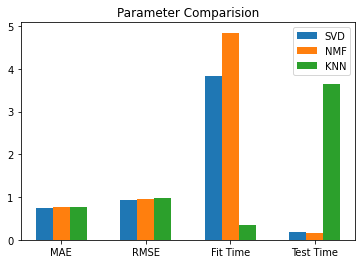

In [17]:
parameter_comparision(svd_movie,nmf_movie,knn_movie)

### **Jester dataset**

In [18]:
df_jester=pd.read_csv("jester_data_new.csv")
df_jester=df_jester.drop(['Number of Ratings'],axis=1)
df_jester

,UserID,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,J11,J12,J13,J14,J15,J16,J17,J18,J19,J20,J21,J22,J23,J24,J25,J26,J27,J28,J29,J30,J31,J32,J33,J34,J35,J36,J37,J38,J39,...,J61,J62,J63,J64,J65,J66,J67,J68,J69,J70,J71,J72,J73,J74,J75,J76,J77,J78,J79,J80,J81,J82,J83,J84,J85,J86,J87,J88,J89,J90,J91,J92,J93,J94,J95,J96,J97,J98,J,J100
0,U1,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,U2,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.00,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,U3,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,U4,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,U5,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,U24979,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.00,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,U24980,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,U24981,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.00,7.23,6.75,-6.00,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,U24982,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2

In [19]:
# copy data to another frame
df2=df_jester

In [20]:
# retrive column names
col_name=df2.columns[1:101]

In [21]:
df3=(df_jester.values)   

In [22]:
# retrive rating from dataset
ratings=(df3[:,1:102].ravel())
ratings.size

2498300

In [23]:
# array of rows
a=[]
for i in range (1,24984):
    a=a+[i]

In [24]:
# array of columns
b=[]
for i in range(100):
  b.extend(a)

In [25]:
b.sort()   # sort array

In [26]:
jokes=[]

for i in range (1,101):
    jokes=jokes+[str(i)]

In [27]:
users=b   #length=2498300
movies=jokes*24983   #length=2498300 

ratings_dict={'userID':users,
              'itemID':movies,
              'rating':ratings}

df_jester=pd.DataFrame(ratings_dict)

In [28]:
df_jester.dropna(inplace=True)

In [29]:
df_jester

,userID,itemID,rating
0,1,1,-7.82
1,1,2,8.79
2,1,3,-9.66
3,1,4,-8.16
4,1,5,-7.52
...,...,...,...
2498267,24983,68,7.48
2498268,24983,69,5.15
2498269,24983,70,3.2
2498270,24983,71,6.26


In [30]:
# function for copmarision of parametes for different algorithms
def parameter_comparision1(svd,nmf):
    # Calculate Average of RMSE, MAE, Fit time and Test time
    ls = ['test_mae','test_rmse','fit_time','test_time']
    svd_ls=[]
    for i in range(len(ls)):
        svd_ls.append(np.mean(svd[ls[i]]))
    nmf_ls=[]
    for i in range(len(ls)):
        nmf_ls.append(np.mean(nmf[ls[i]]))

    print(svd_ls)
    print(nmf_ls)

    # Plot graph of parameters for all methods
    labels = ['MAE','RMSE','Fit Time','Test Time']
    x = svd_ls;
    y = nmf_ls;

    x_axis = np.arange(len(labels))
    plt.bar(x_axis-0.2, x, 0.2, label='SVD')
    plt.bar(x_axis, y, 0.2, label='NMF')

    plt.xticks(x_axis, labels)
    plt.title("Parameter Comparision")
    plt.legend()
    plt.show()

Apply Algorithms on Jester dataset

In [31]:
reader=Reader(rating_scale=(-10,10))
trainset=Dataset.load_from_df(df_jester[['userID','itemID','rating']],reader).build_full_trainset()
data=Dataset.load_from_df(df_jester[['userID','itemID','rating']],reader)

In [32]:
algo = SVD()
algo.fit(trainset)
svd_jester = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.1090  4.1215  4.0994  4.1076  4.0945  4.1064  0.0093  
MAE (testset)     3.1889  3.1992  3.1840  3.1906  3.1790  3.1883  0.0068  
Fit time          71.41   71.97   71.92   71.83   71.71   71.77   0.20    
Test time         6.11    6.22    5.66    5.63    5.58    5.84    0.27    


In [33]:
algo = NMF()
algo.fit(trainset)
nmf_jester = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    5.3217  5.3362  5.3141  5.5528  5.3500  5.3750  0.0898  
MAE (testset)     4.4953  4.4989  4.4938  4.6249  4.5043  4.5235  0.0509  
Fit time          90.39   89.99   90.67   89.92   90.42   90.28   0.28    
Test time         5.25    4.44    5.96    4.50    6.03    5.24    0.68    


In [34]:
# Algorithm takes more memory due to this RAM is full
# algo = KNNBasic()
# algo.fit(trainset)
# knn_jester = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

[3.188348333985572, 4.10642161108577, 71.7701117515564, 5.840625286102295]
[4.523452258164541, 5.374971440159435, 90.27807211875916, 5.23553614616394]


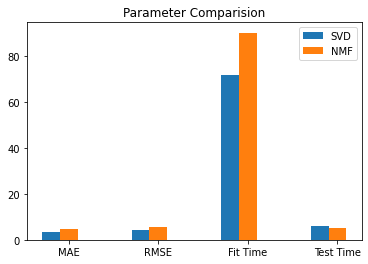

In [35]:
parameter_comparision1(svd_jester,nmf_jester)